In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
import numpy as np
import matplotlib.pyplot as plt
import warnings
from warnings import filterwarnings
warnings.filterwarnings('ignore',category=DeprecationWarning)
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=UserWarning)
warnings.filterwarnings('ignore')

Loading of Mnist Data Set

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print("Size of Train Set:",x_train.shape,y_train.shape)

Size of Train Set: (60000, 28, 28) (60000,)


In [6]:
print("Size of Test Set:",x_test.shape,y_test.shape)

Size of Test Set: (10000, 28, 28) (10000,)


In [7]:
num_labels=len(np.unique(y_train))

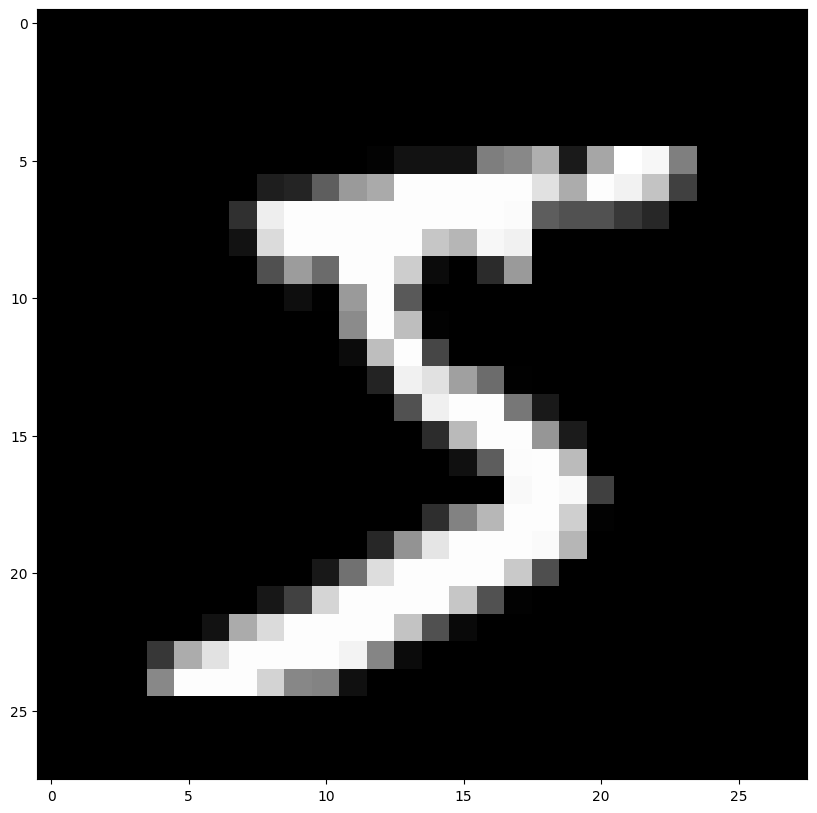

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[0],cmap='gray')
plt.show()

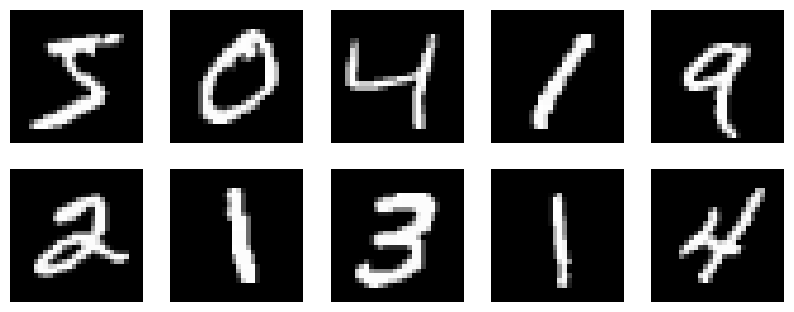

In [9]:
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.axis('off')
plt.show()

In [10]:
def visulize_img(img):
  plt.figure(figsize=(10,10))
  for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(img[i],cmap='gray')
    plt.axis('off')


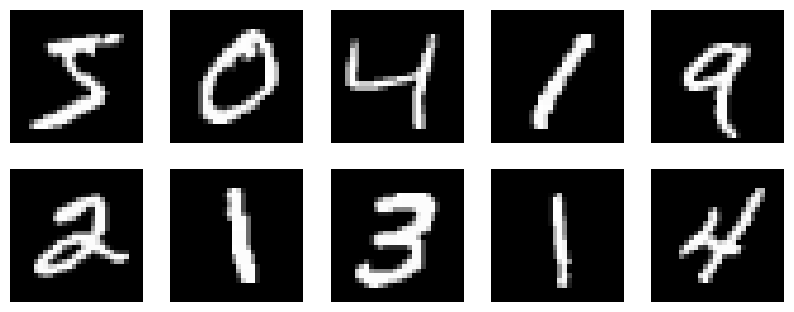

In [11]:
visulize_img(x_train)

In [12]:
#RGB (0-255)

In [13]:
x_train[0].shape

(28, 28)

In [14]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 120, 180,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 126, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2, 153, 210,  40,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 220, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  27, 254, 162,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 222, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 183, 254, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  46, 245, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 198, 254,  56,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 120, 254, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  23, 231, 254,  29,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254, 120,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 163, 254, 216,  16,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  67,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  14,  86, 178, 248, 254,  91,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  85,   0,   0,   0,  47,  49, 116, 144,
        150, 241, 243, 234, 179, 241, 252,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 150, 253, 237, 207, 207, 207, 253, 254, 250, 240,
        198, 143,  91,  28,   5, 233, 250,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 119, 177, 177, 177, 177, 177,  98,  56,   0,
          0,   0,   0,   0, 102, 254, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 137,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [15]:
x_train[2][10,10]

0

In [16]:
x_train[2][14,14]

241

In [17]:
x_train[2].mean()

24.799744897959183

In [18]:
x_train[2].sum()

19443

In [19]:
def pixel_visulize(img):
  fig=plt.figure(figsize=(12,12))
  ax=fig.add_subplot(111)
  widht, height=img.shape
  ax.imshow(img,cmap='gray')
  threshold=img.max()/2.5
  for i in range(widht):
    for j in range(height):
      ax.annotate(str(round(img[i,j],2)),xy=(j,i),horizontalalignment='center',verticalalignment='center',color='white' if img[i,j]<threshold else 'black')


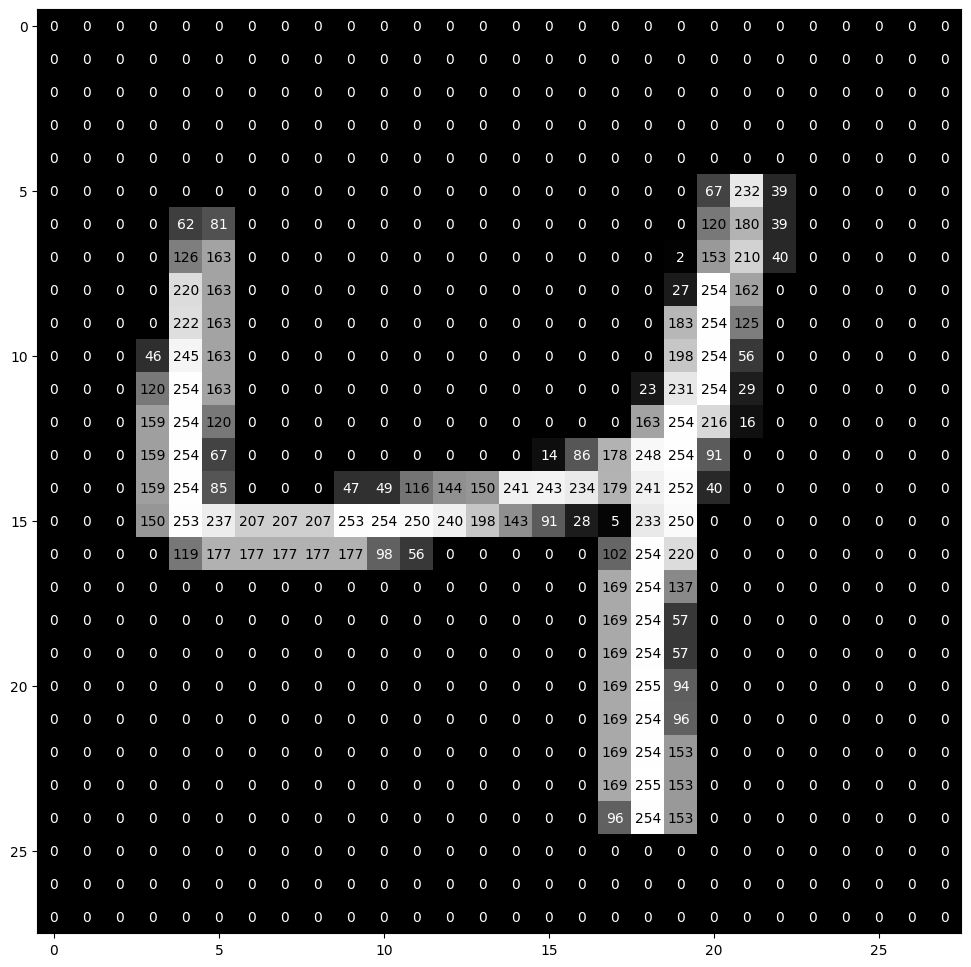

In [20]:
pixel_visulize(x_train[2])

Data Preparation

In [21]:
#Encoding
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [22]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [23]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [24]:
#Reshaping

In [28]:
image_size=x_train.shape[1]


In [29]:
image_size

28

In [30]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [33]:
x_train.shape


(60000, 28, 28, 1)

In [34]:
x_test.shape

(10000, 28, 28, 1)

In [35]:
#Standardization

In [36]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [37]:
#Modeling

In [38]:
from os import name
model=tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128,activation='relu',name="layer1"),
    Dense(units=num_labels,activation='softmax',name="layer2")
])

In [39]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(), 'accuracy'])

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history=model.fit(x_train,y_train,epochs=5,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9828 - loss: 0.0609 - precision: 0.9863 - recall: 0.9795 - val_accuracy: 0.9743 - val_loss: 0.0820 - val_precision: 0.9784 - val_recall: 0.9714
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9856 - loss: 0.0503 - precision: 0.9886 - recall: 0.9834 - val_accuracy: 0.9783 - val_loss: 0.0720 - val_precision: 0.9806 - val_recall: 0.9752
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9889 - loss: 0.0394 - precision: 0.9909 - recall: 0.9872 - val_accuracy: 0.9783 - val_loss: 0.0691 - val_precision: 0.9815 - val_recall: 0.9765
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9904 - loss: 0.0347 - precision: 0.9923 - recall: 0.9886 - val_accuracy: 0.9790 - val_loss: 0.0724 - val_precision: 0.9812 - val_recall: 0.9775
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9920 - loss: 0.0293 - precision: 0.9936 - recall: 0.9902 - val_accuracy: 0.9772 - val_loss: 0.0758 

Graphs of Accuracy and Loss

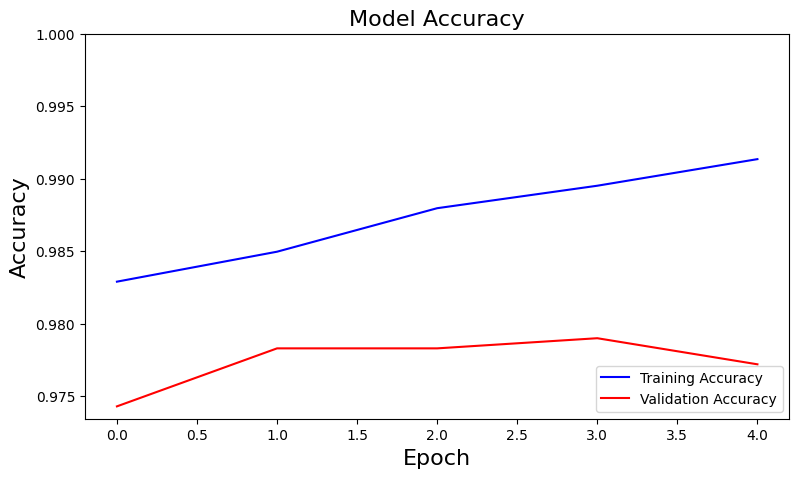

(0.0, 0.08458761731162667)

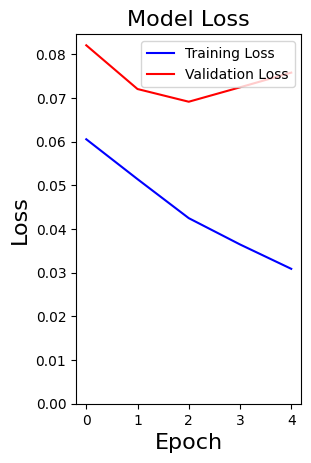

In [54]:
#Graph of Accuracy
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],color='b',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.xlabel('Epoch',fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.show()
#Graph of Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'],color='b',label='Training Loss')
plt.plot(history.history['val_loss'],color='r',label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model Loss',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.xlabel('Epoch',fontsize=16)
plt.ylim([0,max(plt.ylim())])


In [55]:
loss,precision,recall,acc=model.evaluate(x_test,y_test,verbose=False)
print("\nTestAccuracy: %.lf%%"% (100.0*acc))
print("\nTestLoss: %.lf%%"% (100.0*loss))
print("\nTestPrecision: %.lf%%"% (100.0*precision))
print("\nTestRecall: %.lf%%"% (100.0*recall))



TestAccuracy: 98%

TestLoss: 8%

TestPrecision: 98%

TestRecall: 98%


Save Model and Use It for Prediciton

In [58]:
model.save('mnist_model.keras')

In [59]:
import random
random=random.randint(0,x_test.shape[0])

In [60]:
random

360

In [61]:
test_image=x_test[random]

In [62]:
y_test[random]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

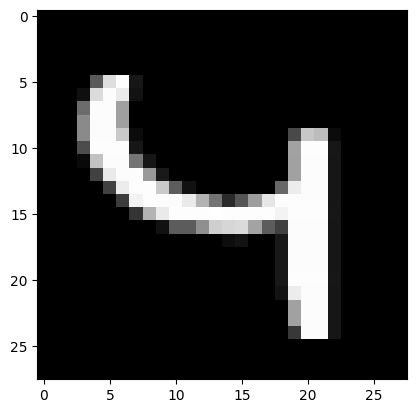

In [64]:
plt.imshow(test_image.reshape(28,28),cmap='gray')

In [65]:
test_data=x_test[random].reshape(1,28,28,1)

In [66]:
probability=model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


In [67]:
probability

array([[6.1998274e-13, 2.1846313e-07, 7.1688362e-09, 2.5894035e-08,
        9.9999845e-01, 1.2149839e-08, 1.7585901e-08, 1.0106567e-06,
        1.8608179e-07, 7.9224336e-08]], dtype=float32)

In [68]:
predicted_classes=np.argmax(probability)

In [69]:
predicted_classes

4